<font size=4><b><center> ΠΑΝΕΠΙΣΤΗΜΙΟ ΠΕΙΡΑΙΏΣ ΤΜΗΜΑ ΨΗΦΙΑΚΩΝ ΣΥΣΤΗΜΑΤΩΝ </center>
    </b>
<br>
<center> ΠΡΟΓΡΑΜΜΑ ΜΕΤΑΠΤΥΧΙΑΚΩΝ ΣΠΟΥΔΩΝ</center>
<center> "Πληροφοριακά Συστήματα και Υπυρεσίες"</center>
<center> Μεγάλα Δεδομένα  & Αναλυτική </center>
</b>
<br>
<center> Πρακτική Μηχανική Μάθηση 2019</center>
</b>
<br>
<center>Επιβλέπων καθηγητής: Ορέστης Τελέλης
</center>
</font>
</b>
<br>
</br>
<center>20/06/2019
</center>
<br>
</br>
<center>ΑΥΓΟΥΣΤΑΤΟΣ ΣΠΥΡΙΔΩΝ | ΑΜ : 1804
</center>
<br>
</br>

![Image of Yaktocat](https://www.smartdatacollective.com/wp-content/uploads/2018/11/Machine-learning-1024x682.jpg)




<br>
</br>
<br>
</br>
<br>
</br>
<br>
</br>
<center><font size=4><b>Δεδομένα</b></font></center>

Δίνονται 2 σύνολα δεδομένων με μετεωρολογικές μετρήσεις απο το κέντρο της Αθήνας

Το πρώτο αφορά τα έτη απο το 2019 έως το 2016 , ενώ το δεύτερο το 2017

Τα πεδία που περιλαμβάνονται στα 2 παραπάνω σετ δεδομένων είναι τα εξής 
1. Μήνας του έτους <i>(month)</i>
2. Μέγιστη Τιμή Θερμοκρασίας <i>(temp_max)</i>
3. Ελάχιστη Τιμή Θερμοκρασίας <i>(temp_min)</i>
4. Βαθμοημέρες Θέρμανσης <i>(days_hot)</i>
5. Βαθμοημέρες Ψύξης <i>(days_cold)</i>
6. Υψος Βροχόπτωσης <i>(rainfall)</i>
7. Μέση Ταχύτητα Ανέμου <i>(avg_wind)</i>
8. Μέγιστη Ταχύτητα Ανέμου <i>(max_wind)</i>


<br>
</br>
<br>
</br>
<center><font size=4><b>Ζητούμενα</b></font></center>
<br>
</br>

<p><font size=3>α)</font> Μέγιστη ή ελάχιστη τιμή θερμοκρασίας </p>
  <font size=1> χωρίς την χρήση του πεδίου 1 και 3 ή 2 αντίστοιχα με την επιλογή</font>
<br>
</br>
<p><font size=3>β)</font>  Ύψος βροχόπτωσης</p>
  <font size=1> δίχως τη χρήση του πεδίου 1</font>
<br>
</br>
<p><font size=3>γ)</font>  Εποχή του έτους </p>
 <font size=1>  δίχως τη χρήση του πεδίου 1</font>
 
<br>
</br><br>
</br> 

<p>Για κάθε ενα απο τα παραπάνω πεδία θα πρέπει να αναπτυχθούν 2 διαφορετικές <b>μέθοδοι πρόβλεψης</b>.Οι συγκρίσεις πρέπει να γίνουν και ως προς τα 2 σετ δεδομένων που είναι διαθέσιμα , δηλαδή του σετ που περιέχει πληροφορία απο το 2009 έως το 2016 και αυτό που περιέχει μόνο το 2017</p>

<b><p>Όλα τα μοντέλα θα εκπαιδευτούν στα δεδομένα που δίνονται στο πρώτο αρχείο (2009-2016) </b>




<b>------------------------------------------------------------------------------------------------------------------------------</b>
<br>
</br>

<br>
</br>
<center><font size=4><b>Εισαγωγή βιβλιοθηκών και συναρτήσεων</b></font></center>

<p>Στο παρακάτω κομμάτι κώδικα δηλώνονται οι απαραίτητες βιβλιοθήκες για την υλοποίηση της εργασίας.</p> 
<p>Επίσης ορίζεται η κλάση <i>statsmodel</i> που θα μας βοηθήσει αργότερα να πραγματοποιήσουμε 10-fold cross validation στο μοντέλο που θα δημιουργήσουμε</p>

In [1]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lm = linear_model.LinearRegression()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor  
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statistics 
import numpy
from numpy import corrcoef
from numpy import around
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn.naive_bayes import MultinomialNB


class statsmodel(BaseEstimator, RegressorMixin):
    def __init__(self, sm_class, formula):
        self.sm_class = sm_class
        self.formula = formula
        self.model = None
        self.result = None
        
    def fit(self,data,dummy):
        self.model = self.sm_class(self.formula,data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

<br>
</br>
<center><font size=4><b>Data Import & Ονοματοδοσία</b></font></center>

<p>Εισάγουμε τα δεδομένα διαβάζοντας τα 2 αρχεία της μορφής .dat </p> 
<p>Τα ονόματα των στηλών ορίζονται βάση της αρχικής περιγραφής των δεδομένων</p>

In [3]:
data2016 = pd.read_csv("athens_09-16.dat",sep=" ",header=None)
data2017 = pd.read_csv("athens_2017.dat",sep=" ",header=None)
data2016.columns=["month","temp_max","temp_min","days_hot","days_cold","rainfall","avg_wind","max_wind"]
data2017.columns=["month","temp_max","temp_min","days_hot","days_cold","rainfall","avg_wind","max_wind"]
rainfall=data2016[["temp_max",'temp_min',"days_hot","days_cold","rainfall","avg_wind","max_wind"]]
rainfalltest=data2017[["temp_max",'temp_min',"days_hot","days_cold","rainfall","avg_wind","max_wind"]]



<br>
</br>
<center><font size=6><b>Ζητούμενο 1</b></font></center>
<center><font size=2><b>Πρόβλεψη της μέγιστης θερμοκρασίας</b></font></center>

<p>Καταχωρούμε 2 νέα data frames temp2016 και temp2017 τα οποία περιέχουν μόνο τα πεδία που θα χρειαστούμε για τις προβλέψεις</p>
<br>
</br>
<font size=1><b><p>**Η ελάχιστη θερμοκρασία και οι μήνες έχουν αφαιρεθεί</p></font></b>

In [4]:
temp2016=data2016[["temp_max","days_hot","days_cold","rainfall","avg_wind","max_wind"]]
temp2017=data2017[["temp_max","days_hot","days_cold","rainfall","avg_wind","max_wind"]]

<br>
</br>
<center><font size=4><b>Εξερέυνηση των δεδομένων</b></font></center>
<br>
</br>
<center><font size=2><b>Scatter plot Matrix</b></font></center>


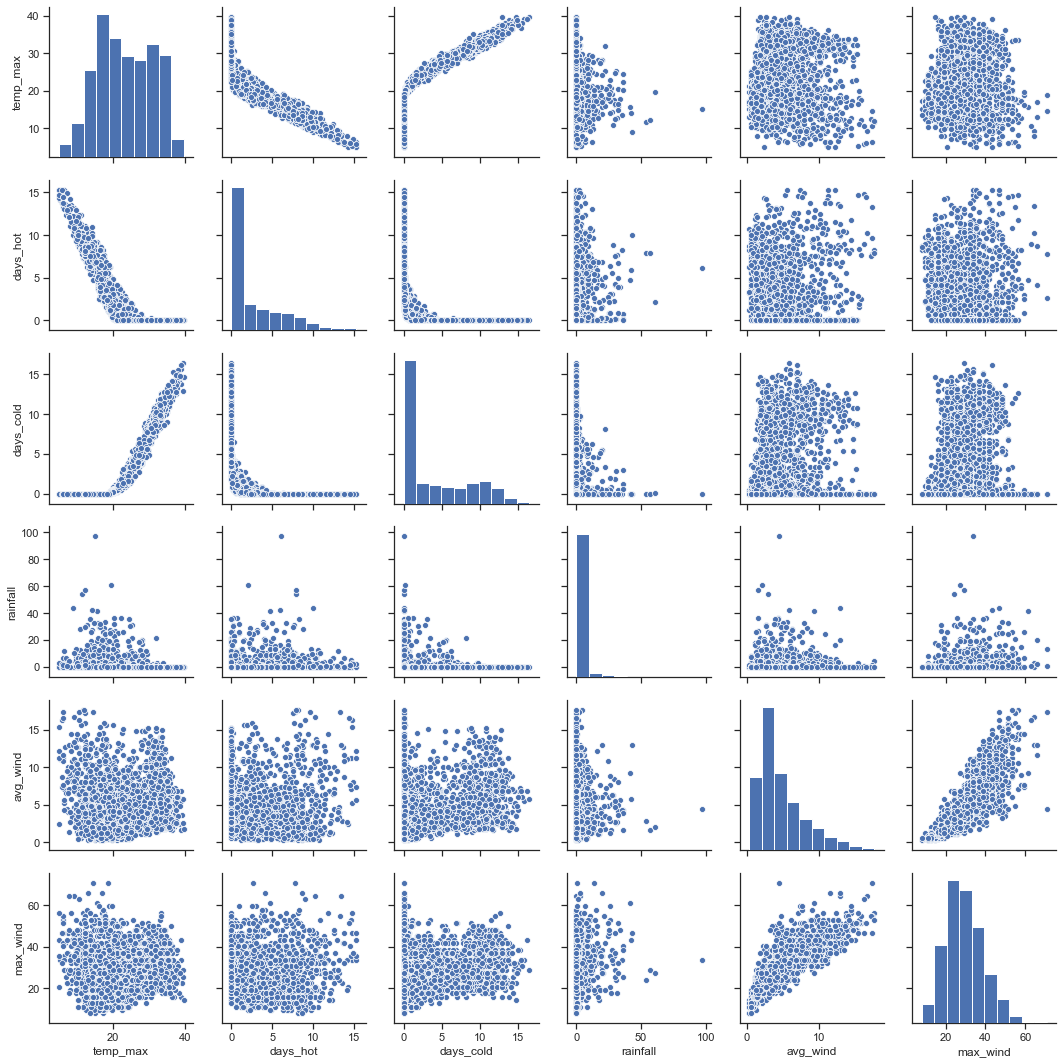

In [5]:
sns.set(style="ticks")
sns.pairplot(temp2016)

<p>Στο παραπάνω scatterplot matrix παρατηρούμε τα διαγράμματα διασποράς μεταξύ των μεταβλητών του πίνακα που έχει δημιουργηθεί για την πρόβλεψη της μέγιστης θερμοκρασίας</p>
<br>
</br>

- <p>Η μέγιστη θερμοκρασία φαίνεται πως έχει δυνατή αρνητική γραμμική συσχέτιση με της βαθμοημέρες θέρμανσης</p>
- <p>Παρουσιάζει επίσης μια δυνατή αρνητική γραμμική συσχέτιση με τις βαθμοημέρες ψύξης</p>
- <p>Η μέγιστη ταχύτητα του ανέμου φαίνεται να είναι θετικά συσχετισμένη με την μέση ταχύτητα του ανέμου κάτι που είναι λογικό και η συσχέτιση τους εκ πρώτης όψεως φαίνεται να είναι μή γραμμική </p>
- <p>Οι υπόλοιπες μεταβλητές φαίνονται λίγο έως καθόλου συσχετισμένες μεταξύ τους </p>



<br></br>
<br></br>
<br></br>
<center><font size=2><b>Πίνακας συχετίσεων</b></font></center>


In [6]:
corr = temp2016.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,temp_max,days_hot,days_cold,rainfall,avg_wind,max_wind
temp_max,1,-0.86,0.92,-0.18,-0.0099,0.0011
days_hot,-0.86,1,-0.63,0.11,0.027,-0.022
days_cold,0.92,-0.63,1,-0.17,0.13,0.09
rainfall,-0.18,0.11,-0.17,1,0.0034,0.13
avg_wind,-0.0099,0.027,0.13,0.0034,1,0.83
max_wind,0.0011,-0.022,0.09,0.13,0.83,1


<p>Στον παραπάνω πίνακα συσχετίσεων παρατηρούμε την γραμμική συσχέτιση των μεταβλητών βάση του συντελεστή συσχέτησης του pearson ( pearson's r) </p>
<br>
</br>

- <p>Η μέγιστη θερμοκρασία φαίνεται πως έχει δυνατή αρνητική γραμμική συσχέτιση με της βαθμοημέρες θέρμανσης (r= -0.86),</p>
- <p>Παρουσιάζει επίσης μια πολύ ισχυρή αρνητική γραμμική συσχέτιση με τις βαθμοημέρες ψύξης (r = 0.92) </p>

Και τα δύο ευρήματα επιβεβαίωνουν την αρχική εικόνα που παίρνουμε απο τον scatterplot matrix 



<br>
</br>
<center><font size=4><b>Μοντέλο 1</b></font></center>
<center><font size=2><b>Γραμμική Παλινδρόμιση</b></font></center>

<br>
</br>
<br>
</br>
<p> Έπειτα απο τα ευρήματα μας για ισχυρές γραμμικές συσχετίσεις στα δεδομένα  το πρώτο μοντέλο που επιλέχθηκε για την πρόβλεψη της μέγιστης θερμοκρασίας είναι αυτό της γραμμικής παλινδρόμησης</p>

- Στο παρακάτω κομμάτι κώδικα χρησιμοποιούμε τις μεταβλητές του dataset <b>(X)</b> και του εισάγουμε την σταθερά του μοντέλου ( add_constant) , ώστε να εκπαιδεύσουμε το μοντέλο μας να προβλέπει την μέγιστη θερμοκρασία <b>(y)</b>
- Αποθηκέυουμε το εκπαιδευμένο μοντέλο στην <b>model</b>



In [7]:
X = temp2016[["days_hot","days_cold","rainfall","avg_wind","max_wind"]] 
X = sm.add_constant(X)
y = temp2016["temp_max"]
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<center><font size=2><b>Περίληψη μοντέλου & εγκυρότητα προβλέψεων στο σετ εκπαιδευσης</b></font></center> 

<p> Στα παρακάτω 2 κομμάτια κώδικα :</p> 

- Εξάγουμε την περίληψη του μοντελόυ ( <b>.summary()</b> ) 
- Προβλέπουμε με το μοντέλο πάνω στα δεδομένα που το εκπαιδέυσαμε ( <b>predict (X)</b> )


- Αξιολογούμε το πόσο καλές ήταν οι προβλέψεις με <b> 4 βασικές μεθόδους</b>:

   1. MAE ( mean absolute error ) σε 10 fold cross validation
   2. R2 ( mean absolute error ) σε 10 fold cross validation
   3. MAPE ( mean absolute percentage error ) σε σχέση με τις προβλέψεις και τις πραγματικές τιμές των δεδομένων
   4. θα χρησιμοποιήσουμε το μοντέλο για να προβλέψουμε τα δεδομένα του 2017 χρησιμοποιόντας τα ως __τεστ σετ__
   

   


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               temp_max   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.241e+04
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:22:55   Log-Likelihood:                -3293.1
No. Observations:                2442   AIC:                             6598.
Df Residuals:                    2436   BIC:                             6633.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7850      0.080    284.630      0.000      22.628      22.942
days_hot      -1.0332      0.007   -141.653      0.000      -1.047      -1.019
days_cold      1.0872      0.006    193.956      0.000       1.076       1.098
rainfall      -0.0357      0.004     -9.406      0.000      -0.043      -0.028
avg_wind      -0.1985      0.011    -18.063      0.000      -0.220      -0.177
max_wind       0.0054      0.004      1.484      0.138      -0.002       0.012
==============================================================================
Omnibus:                       22.297   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.791
Skew:                           0.169   Prob(JB):                     2.51e-06
Kurtosis:                       3.372   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
clf = statsmodel(smf.ols, 'temp_max~days_hot+days_cold+rainfall+avg_wind+max_wind')
MAEcv=cross_val_score(clf, temp2016,temp2016['temp_max'],cv=10,scoring="neg_mean_absolute_error")
R2cv=cross_val_score(clf, temp2016,temp2016['temp_max'],cv=10)
MAPE=(abs(temp2016["temp_max"]-predictions)/temp2016["temp_max"]).mean()



In [9]:
print("R2 per fold:",numpy.around(R2cv,3))

R2 per fold: [0.985 0.986 0.983 0.983 0.985 0.987 0.987 0.988 0.985 0.982]


In [10]:
print("Mean Absolute Error per fold:",numpy.around(MAEcv,3))

Mean Absolute Error per fold: [-0.774 -0.724 -0.77  -0.788 -0.762 -0.669 -0.676 -0.653 -0.687 -0.762]


In [11]:
print("Mean Absolute Percentage Error :",round(MAPE*100,2),"%")

Mean Absolute Percentage Error : 3.72 %


R2 vs MAE Pearson's Correlation :  -0.86


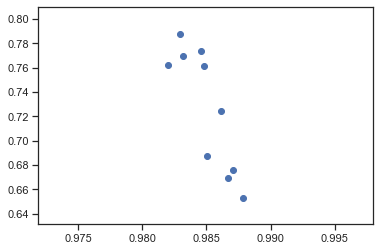

In [12]:
plt.scatter(R2cv,-MAEcv)
print("R2 vs MAE Pearson's Correlation : " ,round((numpy.corrcoef(R2cv,-MAEcv)[1,0]),2))
plt.rcParams["figure.figsize"] = [6,4]


In [13]:
X2017 = temp2017[["days_hot","days_cold","rainfall","avg_wind","max_wind"]]
X2017 = sm.add_constant(X2017)
y2017= temp2017[["temp_max"]]
predictions2017 = model.predict(X2017)
MAPE2017=(abs(y2017["temp_max"]-predictions2017)/y2017["temp_max"]).mean()


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
print("Mean Absolute Percentage Error 2017 :",round(MAPE2017*100,2),"%")

Mean Absolute Percentage Error 2017 : 3.9 %


Predicted vs Actual (Regression)


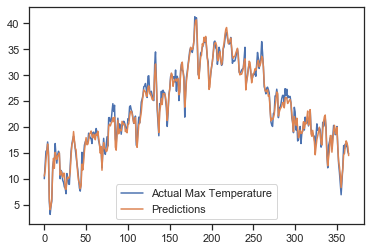

In [15]:
fig, ax = plt.subplots()
ax.plot(y2017,label='Actual Max Temperature')
ax.plot(predictions2017,label='Predictions')
ax.legend()
print("Predicted vs Actual (Regression)")
plt.rcParams["figure.figsize"] = [20,7]

<br>
</br>

<font size=3><b>  Συμπεράσματα</b></font>

<br>
</br>

  1.Απο την περίληψη  το μοντέλο γραμμικής παλινδρόμησης φαίνεται να προσαρμόζεται σχεδόν τέλεια στα δεδομένα __(R2=0.985)__
  
  2.Στο cross validation για τα δεδομενα 2009-2016 οι τιμές του R2 βρίσκονται μεταξύ του __0.982__ και του __0.985__
  
  3.__Στο cross validation  2009-2016__ το απόλυτο σφάλμα βρίσκεται μεταξύ του __0.66__ και του __0.78__. 
  Αυτό σημαίνει πως οι προβλέψεις για την μέγιστη θερμοκρασία πέφτουν απο __0.66 έως 0.78 βαθμούς μακρυά απο τις 
  πραγματικές τιμές σε κάθε ένα απο τα 10 folds__ 
  
  4.Η απόλυτη αυτή απόκλιση μεταφράζεται σε __3.72%__  μέσο απόλυτο σφάλμα στα δεδομένα του 2016-2019 που ήταν και αυτά στα     οποία εκπεδέυσαμε το μοντέλο
  
  5.Στο γράφημα R2 vs MAE φαίνεται πώς πέφτει το απόλυτο σφάλμα όταν το R2 του μοντέλου ανεβαίνε σε κάθε fold. Τα δύο           μεγέθη είναι __ισχυρά συσχετισμένα με μία αρνητική γραμμική συσχέτιση της τάξεως του -0.86__ 
  
  6.Όταν πραγματοποιούμε την πρόβλεψη για τα __δεδομένα του 2017 που είναι άγνωστα για το μοντέλο το μέσο απόλυτο σφάλμα 
  __παραμένει σε πολύ χαμηλή τιμή (3.9%)__ και είναι ελάχιστα μεγαλύτερο απο αυτό του συνόλου εκπαίδευσης
  
  7.Τέλος στο γράφημα Predicted vs Actuals βλέπουμε πόσο κοντά έχουν πέσει __οι προβλέψεις για το 2017__ του εκπαιδευμένου     μοντέλου (2009-2016) σε σχέση με τις πραγματικές τιμές __καθώς οι δύο γραμμές σχεδόν ταυτίζονται__ 
  

<br>
</br>
<br>
</br>

<center><font size=4><b>Μοντέλο 2</b></font></center>
<center><font size=2><b>Νευρωνικό Δίκτυο</b></font></center>

<br>
</br>
<br>
</br>
<p> Για 2ο μοντέλο επιλέχθηκε ένα νευρωνικό δίκτυο . Ο αριθμός των <b>hidden layers</b> επιλέχθηκε έπειτα απο δοκιμές <b>(20)</b> </p>



- Προχωρήσαμε σε προ-επεξεργασία των δεδομένων <b> (normalization) </b>
- Eκπαιδεύουμε ένα νευρωνικό δίκτυο στα προεπεξεργασμένα δεδομένα για το 2009-2016 και έπειτα προβλέπουμε για το 2017
- Αναστρέφουμε το normalization στις προβλέψεις και μετράμε πάλι το μέσο απόλυτο ποσοστιαίο σφάλμα <b>τόσο για τα δεδομένα       εκπαίδευσης (2009-2016) όσο και για το 2017 </b>



In [17]:

mlp = MLPRegressor(hidden_layer_sizes=(20,5),solver="lbfgs",activation="logistic",learning_rate="adaptive",alpha=0.01, max_iter=200000)
min_max_scaler2016 = preprocessing.MinMaxScaler().fit(temp2016)


temp2016n = min_max_scaler2016.transform(temp2016)

temp2017n = min_max_scaler2016.transform(temp2017)

t2016_normalized = pd.DataFrame(temp2016n)

t2017_normalized = pd.DataFrame(temp2017n)

neural_model = mlp.fit(t2016_normalized[[c for c in t2016_normalized.columns if c != 0]], t2016_normalized[[0]])

validation_data_predictions = neural_model.predict(t2017_normalized[[c for c in t2017_normalized.columns if c != 0]])
insample_data_predictions = neural_model.predict(t2016_normalized[[c for c in t2016_normalized.columns if c != 0]])

validation_predictions_pd = pd.DataFrame(data=validation_data_predictions, 
                                     index=t2017_normalized.index.values,
                                     columns=["prediction"])
insample_predictions_pd = pd.DataFrame(data=insample_data_predictions, 
                                     index=t2016_normalized.index.values,
                                     columns=["prediction"])

result_df = t2017_normalized.join(validation_predictions_pd, how="inner")
result_insample = t2016_normalized.join(insample_predictions_pd, how="inner")


#r2_error = r2_score(y_true=result_df[[0]], y_pred=result_df[["prediction"]], multioutput="uniform_average")
#print(r2_error)

result_df[[0]]=result_df[["prediction"]]
del result_df["prediction"]
result_df=min_max_scaler2016.inverse_transform(result_df)
result_df=pd.DataFrame(result_df)
nnpred=result_df[0]


result_insample[[0]]=result_insample[["prediction"]]
del result_insample["prediction"]
result_insample=min_max_scaler2016.inverse_transform(result_insample)
result_insample=pd.DataFrame(result_insample)
nnpredinsample=result_insample[0]


MAPE2017nninsample=(abs(nnpredinsample-temp2016["temp_max"])/temp2016["temp_max"]).mean()
MAPE2017nn=(abs(nnpred-temp2017["temp_max"])/temp2017["temp_max"]).mean()
MAE2017nn=(abs(nnpred-temp2017["temp_max"])).mean()



C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
print("Mean Absolute Percentage Error 2017 :",round(MAPE2017nn*100,2),"%")
print("Mean Absolute Error in sample 2017 :",round(MAE2017nn,2))
print("Mean Absolute Percentage Error in sample :",round(MAPE2017nninsample*100,2),"%")

Mean Absolute Percentage Error 2017 : 4.0 %
Mean Absolute Error in sample 2017 : 0.76
Mean Absolute Percentage Error in sample : 3.76 %


In [19]:
min(abs(nnpredinsample-temp2016["temp_max"])/temp2016["temp_max"])

1.3201080763627404e-07

Predicted vs Actual (MLP)


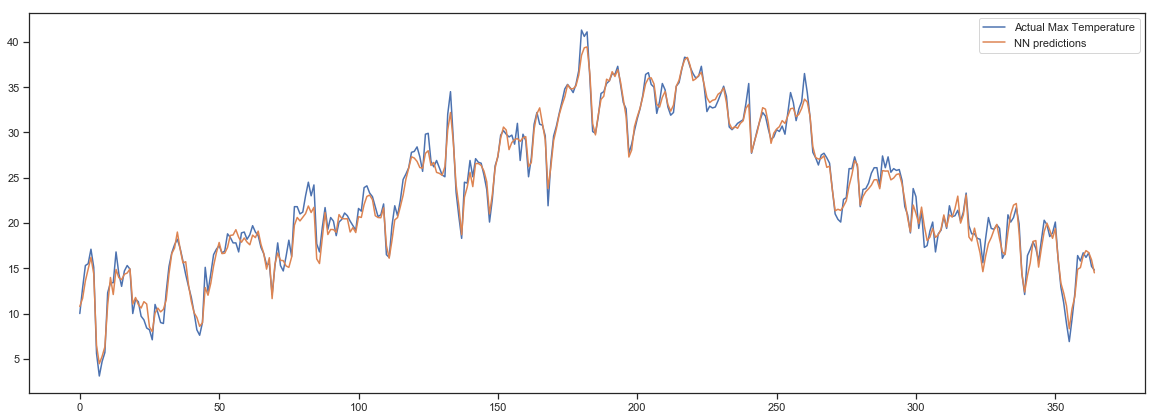

In [20]:
fig, ax = plt.subplots()
ax.plot(y2017,label='Actual Max Temperature')
ax.plot(nnpred,label='NN predictions')
ax.legend()
plt.rcParams["figure.figsize"] = [20,7]
print("Predicted vs Actual (MLP)")

<br>
</br>

<font size=3><b>  Συμπεράσματα</b></font>

<br>
</br>

  1.Το νευρωνικό δίκτυο φαίνεται να προσαρμόζεται πολύ καλά στα δεδομένα

  2.Η μέση απόλυτη απόκλιση του μοντέλου ανέρχεται στους 0.8 βαθμούς στα δεδομένα του 2017 
  
  3.Αυτή η μέση απόλυτη απόκλιση μεταφράζεται σε ~ 5%  μέσο απόλυτο σφάλμα για τα δεδομένα του 2017
  
  4.Τέλος στο γράφημα Predicted vs Actuals βλέπουμε πόσο κοντά έχουν πέσει __οι προβλέψεις για το 2017__ του εκπαιδευμένου     μοντέλου (2009-2016) σε σχέση με τις πραγματικές τιμές . Ενδιαφέρον παρουσιάζει πως σε αρκετά σημεία οι προβλέψεις του     νευρωνικού δικτύου βρίσκονται κάτω απο τις πραγματικές τιμές
  

<br>
</br>

<center><font size=3><b> Γραμμική Παλινδρόμιση VS Νευρωνικό Δίκτυο</b></font></center>

<br>
</br>

- Το μοντέλο γραμμικής παλινδρόμησης φαίνεται να πραγματοποιεί καλύτερες προβλέψεις για τα δεδομένα του 2017 με μέτρο σύγκρισης το μέσο απόλυτο ποσοστιαίο σφάλμα <b>(MAPE REGRESSION :3.9%  VS  MAPE NN : ~5%)</b>

<br>
</br>

- Ποιό συγκεκριμένα το νευρωνικό δικτύο σε πολλά σημεία φαίνεται να <b>υπο-εκτιμά</b> την τιμή της max temp ενω το μοντέλο της       γραμμικής παλλινδρόμησης δεν υποπέφτει σε αυτό το λάθος (όπως δείχνεται και στο παρακάτω συγκριτικό γράφημα)

Actual vs NN vs Regression


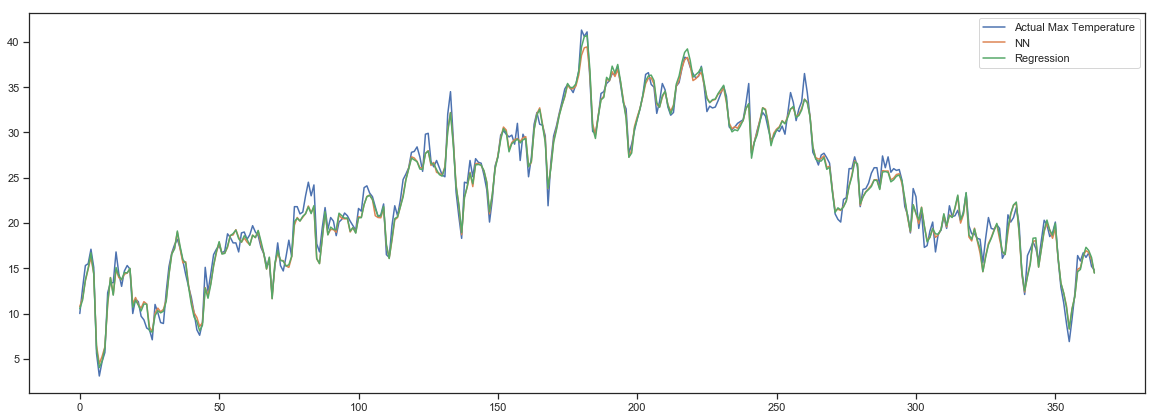

In [21]:
fig, ax = plt.subplots()
ax.plot(y2017,label='Actual Max Temperature')
ax.plot(nnpred,label='NN')
ax.plot(predictions2017,label='Regression')
ax.legend()
plt.rcParams["figure.figsize"] = [20,7]
print("Actual vs NN vs Regression")


<br>
</br>
<center><font size=6><b>Ζητούμενο 2</b></font></center>
<center><font size=2><b>Πρόβλεψη της Βροχόπτωσης</b></font></center>


<br>
</br>
<font size=1><b><p>** Οι μήνες έχουν αφαιρεθεί</p></font></b>

Αν δούμε το γράφημα scatterplot matrix απο το "ζητούμενο 1" τοτε παρατειρούμε πως το ύψος της βροχόπτωσης δεν φαίνεται να σχετίζεται με κανένα άλλο στοιχείο σε ικανοποιητικό επίπεδο. 

<br>
</br>
Συνεπώς θα ήταν δύσκολο να προβλέψουμε το επίπεδο της βροχόπτωσης με αυτές τις συνθήκες 






<br>
</br>
Για να το λύσουμε θα δοκιμάσουμε την κατηγοριοποίηση της μεταβλητής rainfall σε "έβρεξε" ,"δεν έβρεξε" . Δηλαδή πρόβλεψη του συμβάντος και όχι της ποσότητας βροχής τρόπους επεξεργασίας των δεδομένων ώστε να μας βοηθήσουν στην πρόβλεψη

Αλλά πρώτα να δούμε τι θα συμβεί αν προσπαθήσουμε να προβλέψουμε την συνεχή μεταβλητή rainfall όπως αυτή δίνεται στο dataset 


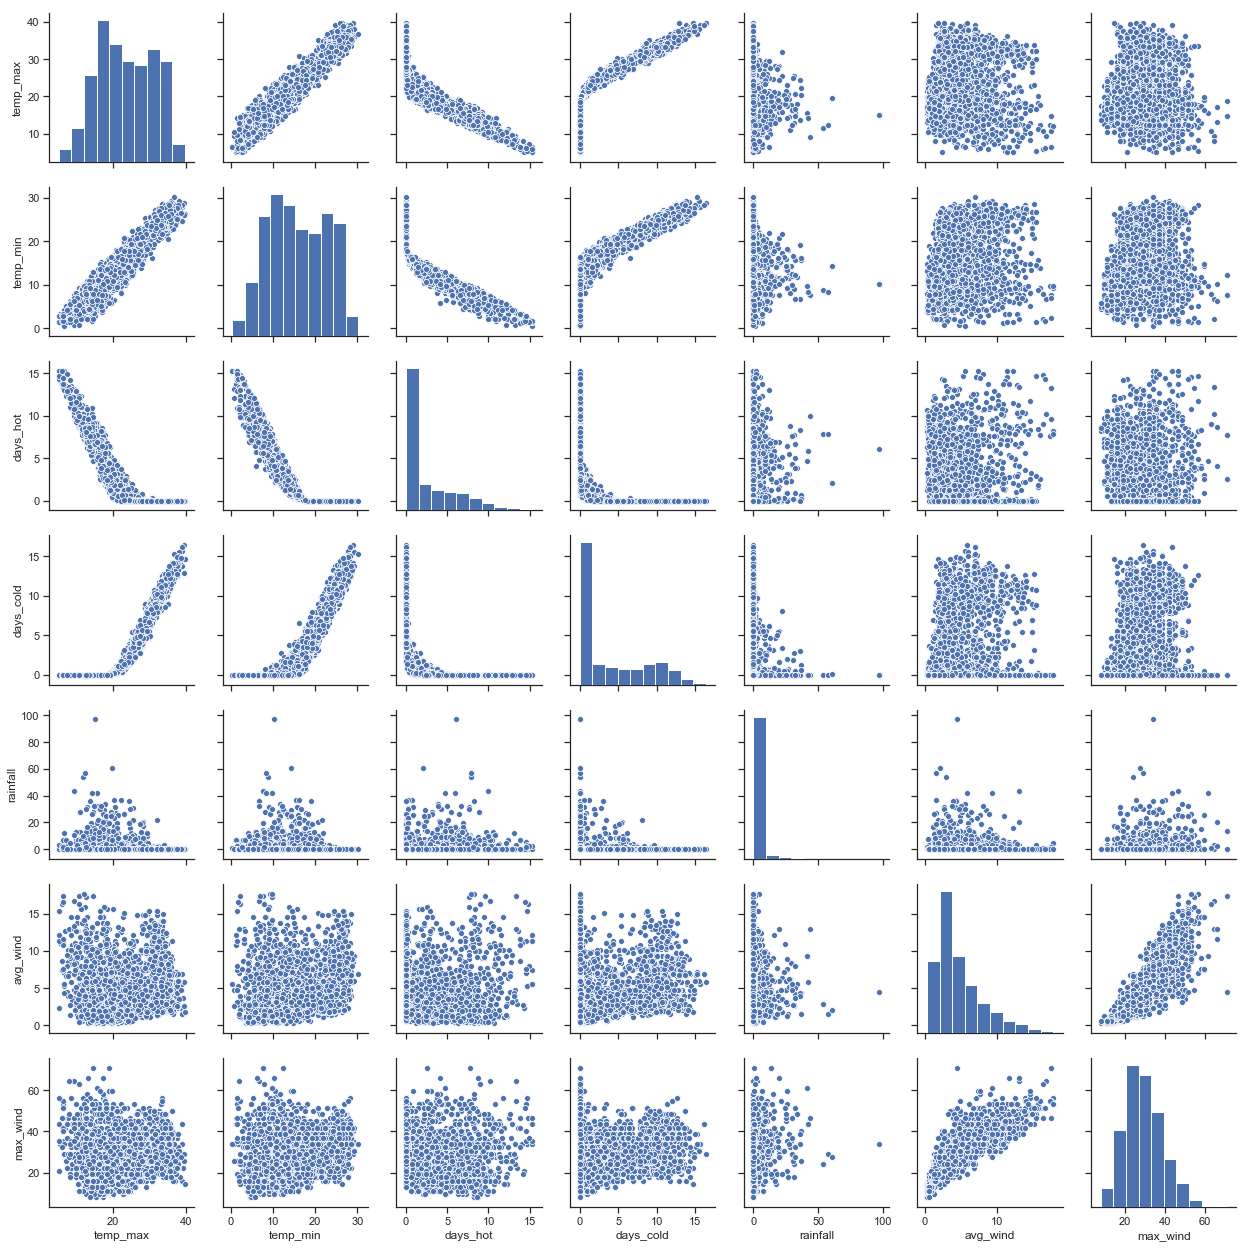

In [22]:
sns.set(style="ticks")
sns.pairplot(rainfall)

In [23]:
corr = rainfall.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,temp_max,temp_min,days_hot,days_cold,rainfall,avg_wind,max_wind
temp_max,1,0.95,-0.86,0.92,-0.18,-0.0099,0.0011
temp_min,0.95,1,-0.86,0.91,-0.13,0.15,0.13
days_hot,-0.86,-0.86,1,-0.63,0.11,0.027,-0.022
days_cold,0.92,0.91,-0.63,1,-0.17,0.13,0.09
rainfall,-0.18,-0.13,0.11,-0.17,1,0.0034,0.13
avg_wind,-0.0099,0.15,0.027,0.13,0.0034,1,0.83
max_wind,0.0011,0.13,-0.022,0.09,0.13,0.83,1


<b> Τόσο απο τον πίνακα scatter plot όσο και απο τον πίνακα συσχετίσεων είναι σαφές πως η μεταβλητή rainfall δεν συσχετίζεται ικανοποιητικά με καμία άλλη μεταβλητή </b>

<br>
</br>
Συνεπώς αν προσπαθήσουμε να την προβλέψουμε με γραμμική παλινδρόμηση θα έχουμε τα αντίστοιχα μη ικανοποιητικά αποτελέσματα:


In [24]:
clf = statsmodel(smf.ols, 'rainfall~temp_max+temp_min+days_hot+days_cold+avg_wind+max_wind')

MAEcv=cross_val_score(clf, rainfall,rainfall['rainfall'],cv=10,scoring="neg_mean_absolute_error")
R2cv=cross_val_score(clf, rainfall,rainfall['rainfall'],cv=10)
MAE=(abs(rainfall["rainfall"]-predictions)).mean()


In [25]:
print("R2 per fold:",numpy.around(R2cv,3))

R2 per fold: [0.087 0.127 0.051 0.12  0.084 0.173 0.13  0.137 0.181 0.072]


In [26]:
X = rainfall[["temp_min","temp_max","days_hot","days_cold","avg_wind","max_wind"]] 
X = sm.add_constant(X)
y = rainfall["rainfall"]
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rainfall   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     56.57
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           1.13e-65
Time:                        21:23:45   Log-Likelihood:                -7328.9
No. Observations:                2442   AIC:                         1.467e+04
Df Residuals:                    2435   BIC:                         1.471e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9325      4.578      0.641      0.522      -6.044      11.909
temp_min       0.5286      0.120      4.421      0.000       0.294       0.763
temp_max      -0.5629      0.141     -4.005      0.000      -0.839      -0.287
days_hot       0.0045      0.244      0.018      0.985      -0.473       0.482
days_cold     -0.0194      0.241     -0.080      0.936      -0.493       0.454
avg_wind      -0.7568      0.060    -12.553      0.000      -0.875      -0.639
max_wind       0.2318      0.018     12.538      0.000       0.196       0.268
==============================================================================
Omnibus:                     3187.550   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729858.779
Skew:                           7.094   Prob(JB):                         0.00
Kurtosis:                      86.497   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
rainfalltest=data2017[["temp_max",'temp_min',"days_hot","days_cold","rainfall","avg_wind","max_wind"]]
X2017 = rainfalltest[["temp_min","temp_max","days_hot","days_cold","avg_wind","max_wind"]]
X2017 = sm.add_constant(X2017)
y2017= temp2017[["rainfall"]]
predictions2017 = model.predict(X2017)
MAE2017=(abs(rainfalltest["rainfall"]-predictions2017)).mean()


Predicted vs Actual Regression in 2017


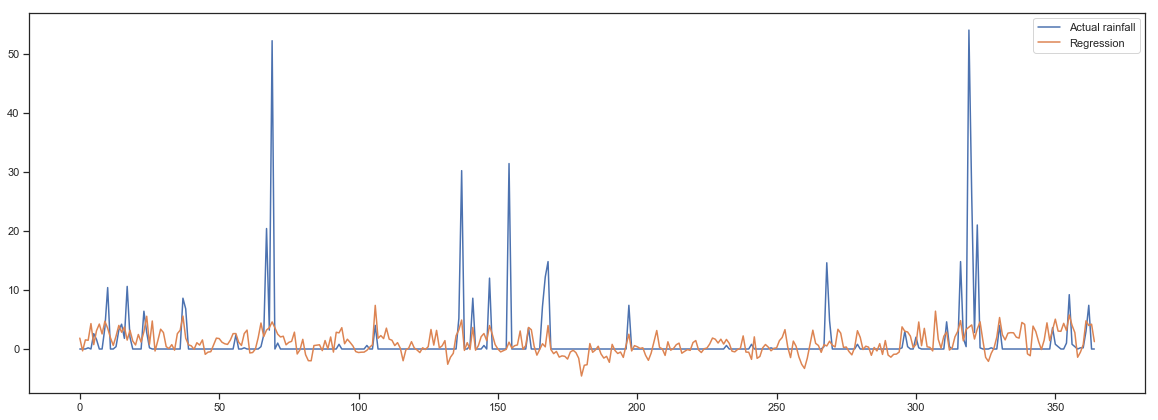

In [29]:
fig, ax = plt.subplots()
ax.plot(y2017,label='Actual rainfall')
ax.plot(predictions2017,label='Regression')
ax.legend()
plt.rcParams["figure.figsize"] = [20,7]
print("Predicted vs Actual Regression in 2017")

<b>Στο παραπάνω γράφημα  είναι ξεκάθαρο πως η γραμμική παλλινδρόμηση δεν μπορει να προσεγγίσει το πρόβλημα με σωστό τρόπο.</b>
<br>
<br>
- Σε ημέρες που η βροχόπτωση ήταν μηδενική υπάρχουν προβλέψεις για κάποιο όγκο νερού 
- Υπάρχουν σπάνια συμβάντα όπου η βροχή φαίνεται να ήταν αρκετά έντονη συγκριτικά με τι συνηθισμένες τιμές και η             παλινδρόμηση υποπροβλέπει κατα πολυ την πραγματική τιμή
- Σε μερικές περιπτώσεις  το μοντέλο προβλέπει αρνητική βροχή !!


__Θα δοκιμαστεί ο αλγόριθμος DecisionTreeRegressor__

In [30]:
X3 = rainfall[["temp_max",'temp_min',"days_hot","days_cold","avg_wind","max_wind"]]
y3 = rainfall[["rainfall"]]
# create a regressor object 
regressor = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
regtree=regressor.fit(X3, y3) 
y_pred = regressor.predict(X3)
MAE3=(abs(rainfall["rainfall"]-y_pred)).mean()

Actual vs Regressor Trees


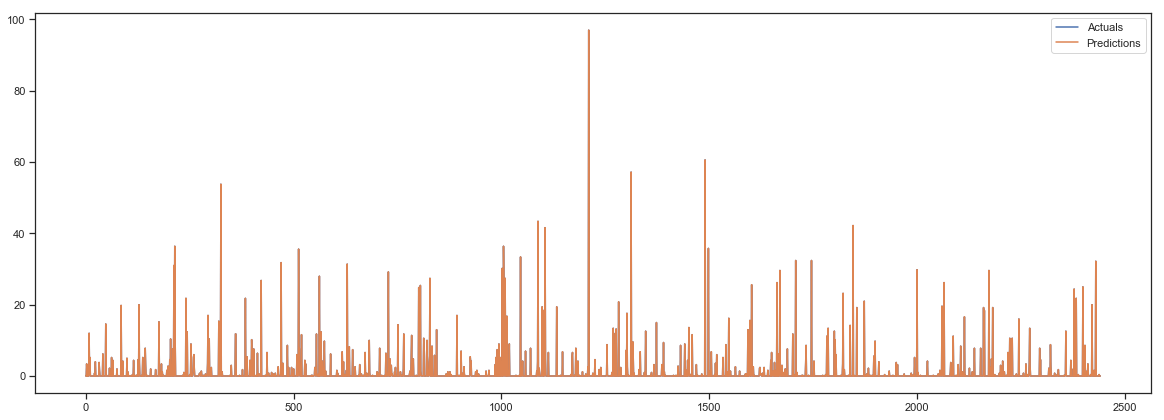

In [31]:
fig, ax = plt.subplots()
ax.plot(rainfall[["rainfall"]],label='Actuals')
ax.plot(y_pred,label='Predictions')
#ax.plot(y_pred,label='Predictions')
ax.legend()
plt.rcParams["figure.figsize"] = [20,7]
print("Actual vs Regressor Trees")

In [32]:
X4 = rainfalltest[["temp_max",'temp_min',"days_hot","days_cold","avg_wind","max_wind"]]
y_pred2 = regtree.predict(X4)
MAE4=(abs(rainfalltest["rainfall"]-y_pred2)).mean()
MAE4

2.637260273972604

Actual vs Regressor Trees 2017


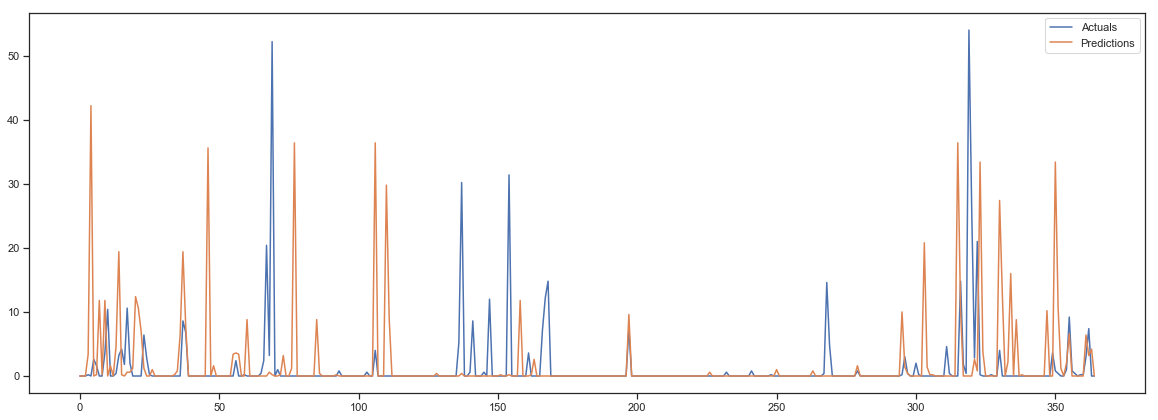

In [33]:
fig, ax = plt.subplots()
ax.plot(rainfalltest[["rainfall"]],label='Actuals')
ax.plot(y_pred2,label='Predictions')
#ax.plot(y_pred,label='Predictions')
ax.legend()
plt.rcParams["figure.figsize"] = [20,7]
print("Actual vs Regressor Trees 2017")

<b>Στο παραπάνω γράφημα  είναι ξεκάθαρο πως τα Regressor Trees προσαρμόζονται στο πρόβλημα πρόβλεψης της βροχόπτωσης καλύτερα από ότι η απλή γραμμική παλινδρόμηση</b>
<br>
<br>
- Φαίνεται πως ο αλγόριθμος προσομοιώνει την φύση των αραιών γεγονότων της βροχής και προβλέπει το ενδεχόμενο σε έγκυρες         περιόδους 
- Παρόλαυτα βλέπουμε οτι ούτε ο συγκεκριμένος αλγόριθμος προβλέπει ικανοποιητικά την ποσότητα της βροχής


<br>
</br>
<center><font size=6><b>Ζητούμενο 3</b></font></center>
<center><font size=2><b>Κατηγοριοποίηση των εποχών</b></font></center>


<br>
</br>

In [34]:
seasons2016=data2016
seasons2017=data2017
seasons2016["season"]=0
seasons2016["season"][seasons2016["month"] == 1]="winter"
seasons2016["season"][seasons2016["month"] == 2]="winter"
seasons2016["season"][seasons2016["month"] == 3]="spring"
seasons2016["season"][seasons2016["month"] == 4]="spring"
seasons2016["season"][seasons2016["month"] == 5]="spring"
seasons2016["season"][seasons2016["month"] == 6]="summer"
seasons2016["season"][seasons2016["month"] == 7]="summer"
seasons2016["season"][seasons2016["month"] == 8]="summer"
seasons2016["season"][seasons2016["month"] == 9]="fall"
seasons2016["season"][seasons2016["month"] == 10]="fall"
seasons2016["season"][seasons2016["month"] == 11]="fall"
seasons2016["season"][seasons2016["month"] == 12]="winter"


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
seasons2017["season"]=0
seasons2017["season"][seasons2017["month"] == 1]="winter"
seasons2017["season"][seasons2017["month"] == 2]="winter"
seasons2017["season"][seasons2017["month"] == 3]="spring"
seasons2017["season"][seasons2017["month"] == 4]="spring"
seasons2017["season"][seasons2017["month"] == 5]="spring"
seasons2017["season"][seasons2017["month"] == 6]="summer"
seasons2017["season"][seasons2017["month"] == 7]="summer"
seasons2017["season"][seasons2017["month"] == 8]="summer"
seasons2017["season"][seasons2017["month"] == 9]="fall"
seasons2017["season"][seasons2017["month"] == 10]="fall"
seasons2017["season"][seasons2017["month"] == 11]="fall"
seasons2017["season"][seasons2017["month"] == 12]="winter"

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
del seasons2016["month"]
del seasons2017["month"]

In [37]:
X5 = seasons2016[["temp_max",'temp_min',"days_hot","days_cold","rainfall","avg_wind","max_wind"]]
y5 = seasons2016[["season"]]
# create a regressor object 
regressor =  AdaBoostClassifier()
# fit the regressor with X and Y data 
regtree=regressor.fit(X5, y5) 
y_pred = regressor.predict(X5)

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix( y5, y_pred)
cm

array([[ 30, 249,  57, 272],
       [ 11, 158,  13, 434],
       [  2, 591,  36,   0],
       [  3,   1,   0, 585]], dtype=int64)

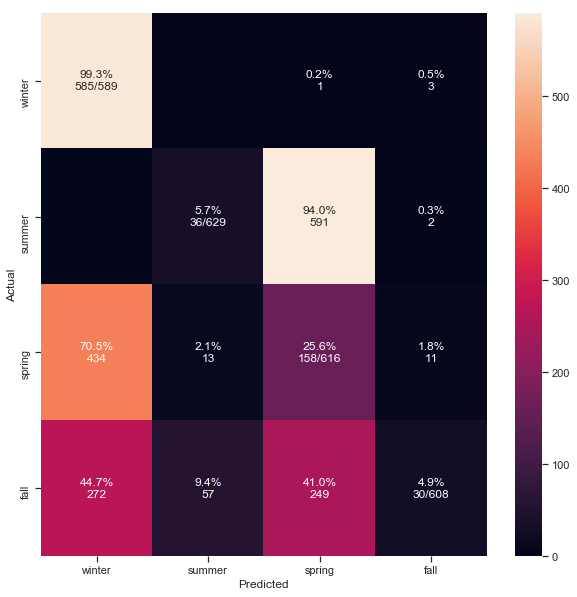

In [39]:
cm_analysis( y5,y_pred,"saved",labels=["winter","summer","spring","fall"])


In [40]:
seasonstest=seasons2017
X2017 = seasonstest[["temp_max",'temp_min',"days_hot","days_cold","rainfall","avg_wind","max_wind"]]
y2017= seasonstest["season"]
predictions2017 = regtree.predict(X2017)


In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix( y2017,predictions2017)
cm

array([[ 4, 29,  5, 53],
       [ 2, 26,  2, 62],
       [ 1, 84,  7,  0],
       [ 2,  0,  0, 88]], dtype=int64)

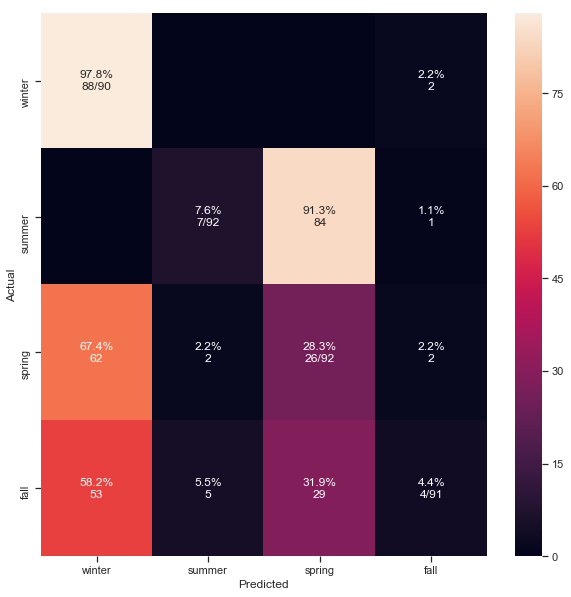

In [42]:
cm_analysis( y2017,predictions2017,"saved",labels=["winter","summer","spring","fall"])


In [43]:
regressor = MultinomialNB()
# fit the regressor with X and Y data 
regtree=regressor.fit(X5, y5) 
y_pred = regressor.predict(X5)

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
cm=confusion_matrix( y5, y_pred)
cm

array([[137, 167, 234,  70],
       [ 93, 262, 114, 147],
       [ 16,   6, 607,   0],
       [  5, 118,   0, 466]], dtype=int64)

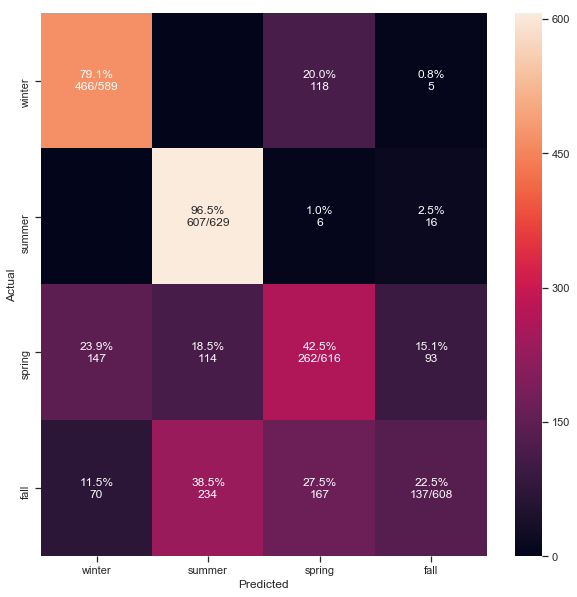

In [45]:
cm_analysis( y5,y_pred,"saved",labels=["winter","summer","spring","fall"])


In [46]:
predictions2017 = regtree.predict(X2017)


In [47]:
cm=confusion_matrix( y2017,predictions2017)
cm

array([[24, 29, 27, 11],
       [12, 44, 19, 17],
       [ 6,  1, 85,  0],
       [ 0, 16,  0, 74]], dtype=int64)

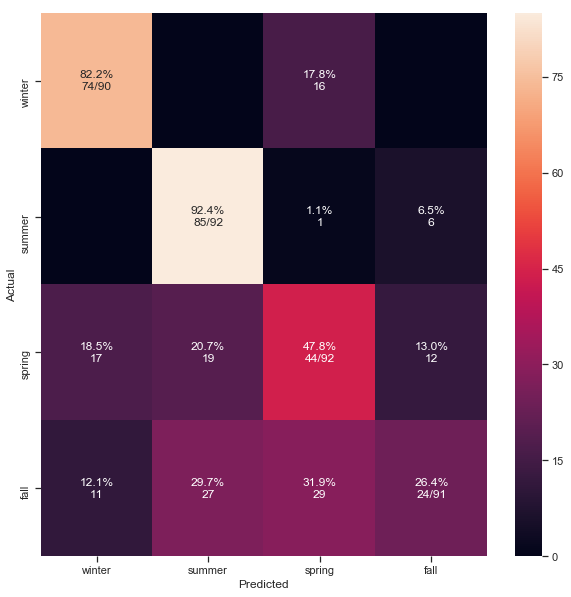

In [48]:
cm_analysis( y2017,predictions2017,"saved",labels=["winter","summer","spring","fall"])


<b>Στο παραπάνω κομμάτι κώδικα εκπαιδεύτηκαν οι αλγόριθμοι Adaboost & Multinomial Naive Bayes με σκοπό την κατηγοριοποίηση της μεταβλητής season που ορίζει την
εποχή του έτους</b>
<br>
<br>
<center> <b>Πιο αναλυτικά </b> </center>
<br>
</br>
<b>Για τον αλγόριθμο Adaboost</b> 
<br>
</br>
 
- Accuracy στο training set (2016) : 33.4% 
- Accuracy στο test set (2017): 32.2%
- Από τις παραπάνω μετρικές και μόνο είναι εμφανές πως ο αλγόριθμος δεν εχει καλή προβλεπτική ικανότητα ούτε για τα           δεδομένα της εκπαίδευσης και προφανώς ούτε και σε άγνωστα δεδομένα όπως οι εποχές για το 2017
- Το μοντέλο όπως φαίνεται και απο τον πίνακα σύγχησης προβλέπει με μεγάλη ακρίβεια την εποχή του χειμώνα 99.3% και 97.8%
  για training & test set αντίστοιχα. Αυτό όμως δεν έχει πρακτικά καμία αξία καθώς αν προσέξουμε τείνει να κατατάσσει ώς     "χειμώνα" και πολλές παρατηρήσεις που στην πραγματικότητα ανήκουν σε άλλη εποχή, και έτσι καταλήγουμε στο πολύ χαμηλό       συνολικό accuracy      
  
  
 <br>
</br>
Για τον αλγόριθμο <b> Naive Bayes Multinomial</b> 
<br>
</br> 

- Accuracy στο training set (2016) : 60.5% 
- Accuracy στο test set (2017): 62.2%
- Από τις παραπάνω μετρικές φαίνεται πως ο Naive Bayes Multinomial έχει καλύτερη προβλεπτική ικανότητα σε σχέση με τον 
  Adaboost τοσο μέσα στα δεδομένα απο τα οποία εκπαιδεύτηκε όσο και για τις εποχές του 2017
- Παρόλαυτα το μοντέλο εμφανίζει τα ίδια προβλήματα με τον Adaboost αλλά για λιγότερες κλάσεις. Αν δούμε τον πίνακα           σύγχησης το μοντέλο Naive Bayes Multinomial τείνει να προβλέπει πολύ καλα τις εποχές χειμώνα και καλοκαίρι, όμως           κατατάσσει την άνοιξη περισσότερο ώς χειμώνα ενώ το φθινόπωρο ώς καλοκαίρι 

  
    

-------------  ΤΕΛΟΣ --------------- 